In [3]:
import os
import cv2
import matplotlib.pyplot as plt

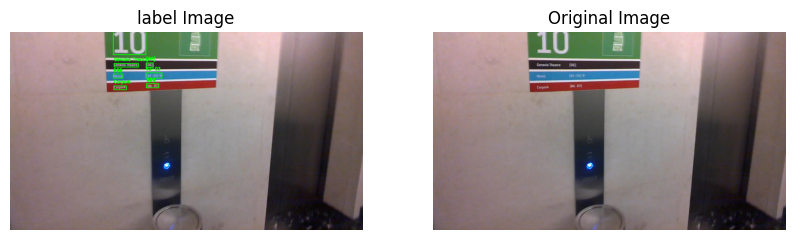

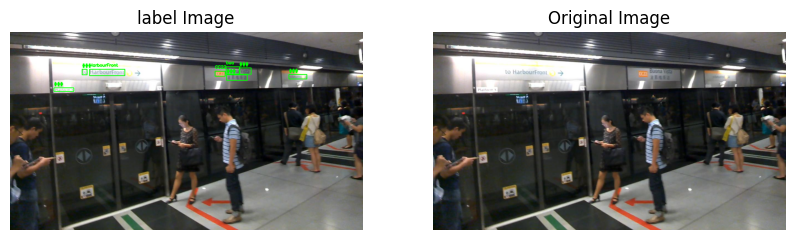

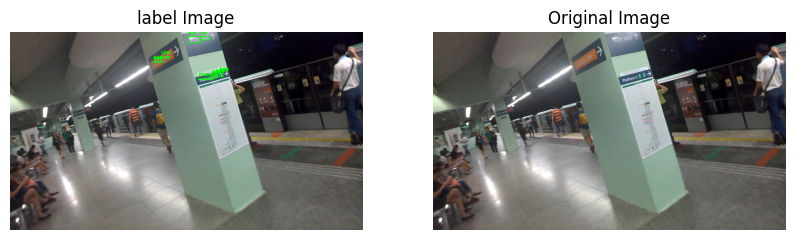

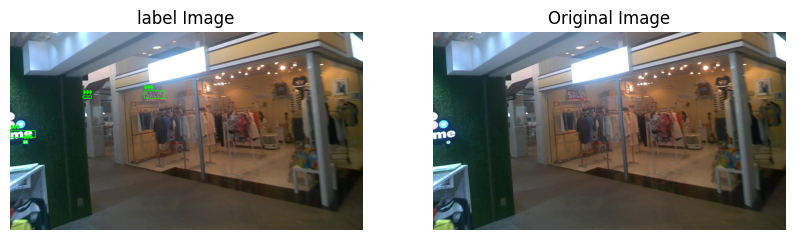

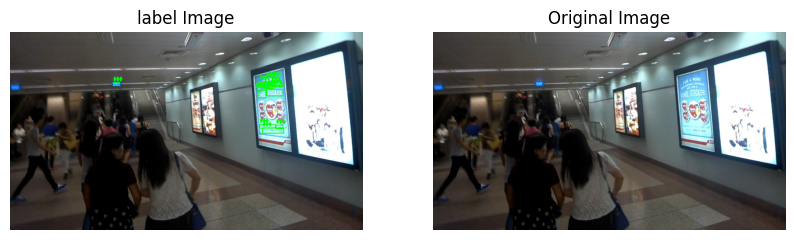

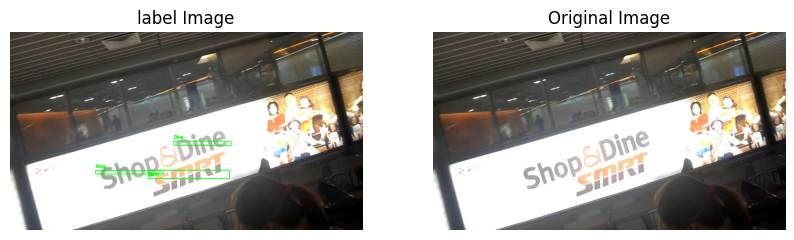

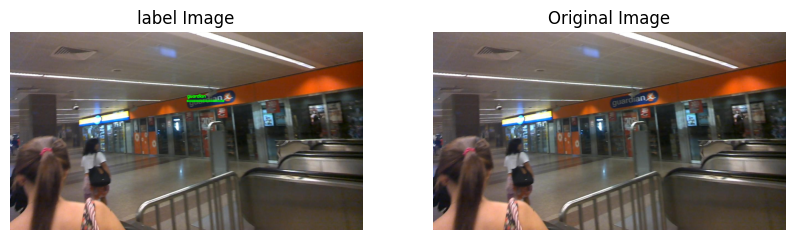

KeyboardInterrupt: 

In [9]:
training_image_dir = './archive/ch4_training_images/'
training_image_label_dir = './archive/ch4_training_localization_transcription_gt/'

# 讀取資料夾中的所有圖片檔案
image_files = os.listdir(training_image_dir)

# 對每張圖片進行處理
for image_file in image_files:
    # 讀取圖片
    image_path = os.path.join(training_image_dir, image_file)
    image = cv2.imread(image_path)

    # 讀取相對應的標記檔案
    label_file = 'gt_' + image_file.replace('.jpg', '.txt')
    label_path = os.path.join(training_image_label_dir, label_file)

    with open(label_path, 'r', encoding='utf-8-sig') as file:
        lines = file.readlines()

    # 在圖片上繪製bounding box
    for line in lines:
        data = line.strip().split(',')
        x1, y1, x2, y2, x3, y3, x4, y4, label = data[:9]
        x1, y1, x2, y2, x3, y3, x4, y4 = map(int, [x1, y1, x2, y2, x3, y3, x4, y4])
        cv2.rectangle(image, (x1, y1), (x3, y3), (0, 255, 0), 2)
        cv2.putText(image, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Figure 的尺寸大小為寬度 10 單位、高度 5 單位。這樣做可以確保兩張圖片在一個較大的畫布上顯示
    plt.figure(figsize=(10, 5))
    
    # 將畫布分成 1 行 2 列，並選擇第一個子圖作為當前操作的目標
    plt.subplot(1, 2, 1)
    plt.title('label Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #這行程式碼將 BGR 格式的圖片轉換為 RGB 格式後顯示在畫布上，因為 Matplotlib 預期的是 RGB 格式的圖片
    plt.axis('off')

    # 將畫布分成 1 行 2 列，並選擇第二個子圖作為當前操作的目標
    original_image = cv2.imread(image_path)
    plt.subplot(1, 2, 2)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()